In [1]:
import Merge_Cartesian as Merge_Full

from decimal import *
import math
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget
L_Time = '10'
C_Time = '0.1'

L_impedance = '1000'
C_impedance = '1'

number_periods = '1'

#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_impedance,L_Time,'1']
Capacitor_List = [C_impedance,C_Time,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

In [3]:
(Storage_Inductor_Completed, 
Storage_Capacitor_Completed,
Voltage_Away,
Current_Away,
Voltage_Return,
Current_Return,
Inductor_Sending_Time,
Capacitor_Sending_Time,
Inductor_Arrival_Time,
Capacitor_Arrival_Time
) = Merge_Full.Process_Wavefronts(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        5000
Inductor Capacitance Per Length :       0.005
Inductor Length :                       1
Inductor Total Inductance :             5000
Inductor Total Capacitance :            0.005
Inductor Velocity :                     0.2
Inductor Time Delay :                   5
Inductor Impedance :                    1000

- The Capacitor -
Capacitor Inductance Per Length :       0.05
Capacitor Capacitance Per Length :      0.05
Capacitor Length :                      1
Capacitor Total Inductance :            0.05
Capacitor Total Capacitance :           0.05
Capacitor Velocity :                    2E+1
Capacitor Time Delay :                  0.05
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  99.34588265796755071824115568
Number of Wavefronts :                  1982040
Number of Layers :                      995


In [4]:
len(Storage_Inductor_Completed) + len(Storage_Capacitor_Completed)

1980050

In [5]:
def to_float(item):
    return float(item)

vectorized_float = np.vectorize(to_float)

In [6]:
def delete_alternating(arr):
    
    x_len,ylen = arr.shape
    
    x_delete = np.arange(1,x_len,2)
    y_delete = np.arange(1,ylen,2)

    arr_deleted = np.delete(arr,x_delete, axis=0)
    arr_deleted = np.delete(arr_deleted,y_delete, axis=1)
    
    return arr_deleted

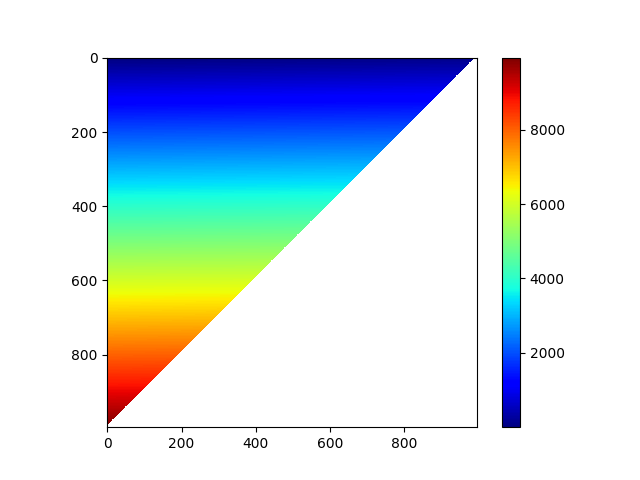

In [7]:
figc,axc =plt.subplots()

Time_float = vectorized_float(Inductor_Sending_Time)

Time_float = delete_alternating(Time_float)

Time_float_masked = np.ma.masked_where(Time_float == 0, Time_float)

c = plt.imshow(Time_float_masked,cmap=cm.jet)
plt.colorbar(c)

In [8]:
Voltage_Accumulation_Inductor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))
Current_Accumulation_Inductor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))

Voltage_Accumulation_Capacitor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))
Current_Accumulation_Capacitor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))

for layer_number in range(0,Merge_Full.Number_of_Layers):
        ## Reset Centre Index    
        Centre_Index_x = 2*layer_number
        Centre_Index_y = 0
        
        for node_number in range(0,layer_number+1):
                # Inductor
                Away_Index_Inductor_x = Centre_Index_x + 1
                Away_Index_Inductor_y = Centre_Index_y
                
                Return_Index_Inductor_x = Centre_Index_x - 1
                Return_Index_Inductor_y = Centre_Index_y
                
                # Capacitor
                Away_Index_Capacitor_x = Centre_Index_x 
                Away_Index_Capacitor_y = Centre_Index_y + 1
                
                Return_Index_Capacitor_x = Centre_Index_x 
                Return_Index_Capacitor_y = Centre_Index_y - 1

                if(node_number == 0 and layer_number ==0): 
                        # Origin Node
                        # Inductor, Origin node = Away only
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        
                        # Capacitor, Origin node = Away only
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 

                elif(node_number == 0 ): 
                        # First Node
                        # Inductor, First Node = Both Merging 
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Voltage_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Current_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        
                        # Capacitor, First Node = Away only
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y]

                elif(node_number == layer_number): 
                        # Last Node
                        # Inductor, Last Node = Away only
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y]
                         
                        # Capacitor, Last Node = Both Merging
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Voltage_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y]) 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Current_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                else:
                        # General Node
                        # Inductor, General Node = Both merging
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Voltage_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Current_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        
                        # Capacitor, General Node = Both merging
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Voltage_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Current_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                        
                Centre_Index_x -= 2
                Centre_Index_y += 2
                

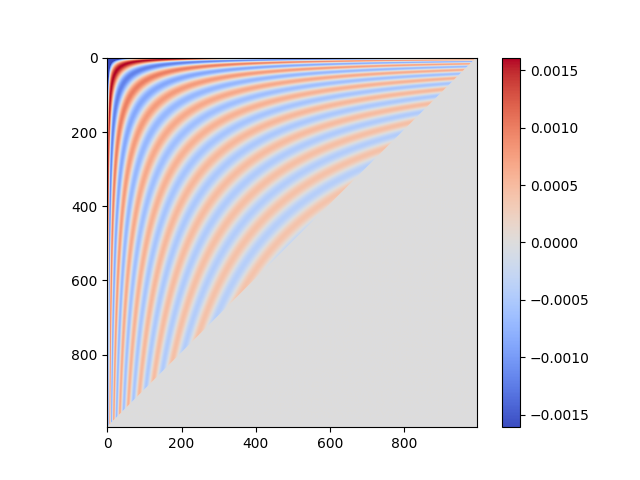

In [9]:
fig1,ax1 = plt.subplots()
Voltage_Inductor = delete_alternating(vectorized_float(Voltage_Accumulation_Inductor))

Voltage_Contrast = copy.copy(Voltage_Inductor)
Voltage_Contrast[0,0] = 0
max_boundary = np.max(Voltage_Contrast)  

c = plt.imshow(Voltage_Inductor,cmap=cm.coolwarm,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

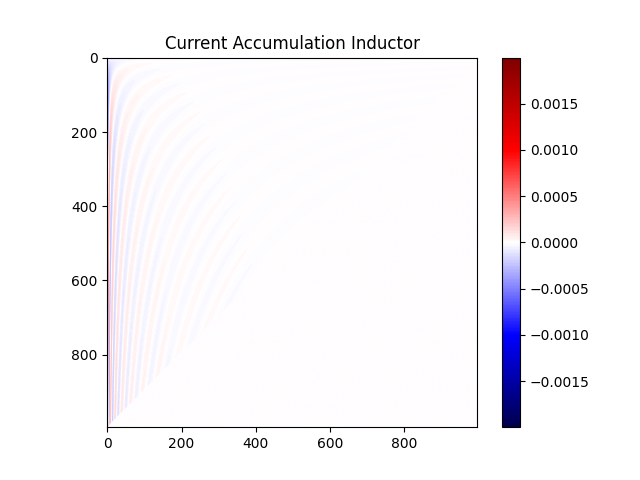

In [10]:
fig2,ax2 = plt.subplots()
plt.title("Current Accumulation Inductor")
Current_Inductor = delete_alternating(vectorized_float(Current_Accumulation_Inductor))
max_boundary = np.max(Current_Inductor)  

c = plt.imshow(Current_Inductor,cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

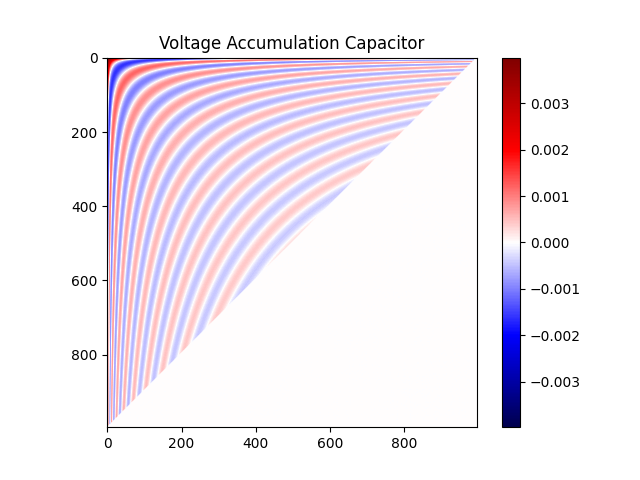

In [11]:
fig3,ax3 = plt.subplots()
plt.title("Voltage Accumulation Capacitor")
Voltage_Capacitor = delete_alternating(vectorized_float(Voltage_Accumulation_Capacitor))
max_boundary = np.max(Voltage_Capacitor)  

c = plt.imshow(Voltage_Capacitor,cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

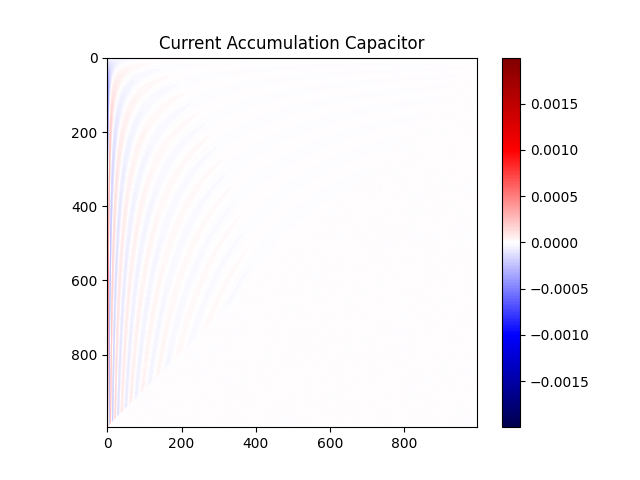

In [12]:
fig4,ax4 = plt.subplots()
plt.title("Current Accumulation Capacitor")
Current_Capacitor = delete_alternating(vectorized_float(Current_Accumulation_Capacitor))
max_boundary = np.max(Current_Capacitor)  

c = plt.imshow(Current_Capacitor,cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Nx,Ny = Voltage_Capacitor.shape
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,Voltage_Capacitor,cmap=cm.coolwarm)

# Higher Order Merging

## Demonstrating co-factors and LCM -> array index 

In [13]:
Merge_Full.LCM

Decimal('10.0')

In [14]:
Merge_Full.GCD

Decimal('0.1')

In [15]:
Merge_Full.Inductor_LCM_Factor

1

In [16]:
Merge_Full.Capacitor_LCM_Factor

100

In [17]:
a = Merge_Full.Inductor_LCM_Factor
b = Merge_Full.Capacitor_LCM_Factor

In [18]:
if(Merge_Full.is_Higher_Merging):
    Time_float[a,0]

In [19]:
if(Merge_Full.is_Higher_Merging):
    Time_float[0,b]

## Functions for routine

In [20]:
def make_upper_and_lower(arr,b_factor):
    upper = arr[:,0:b_factor]
    lower = arr[:,b_factor:]
    
    padding_for_upper = np.full(lower.shape,0,dtype=lower.dtype)
    padding_for_lower = np.full(upper.shape,0,dtype=upper.dtype)
    
    upper= np.append(upper,padding_for_upper,axis=1)
    lower= np.append(lower,padding_for_lower,axis=1)
    
    return upper,lower

In [21]:
upper_voltage_capacitor,lower_voltage_capacitor = make_upper_and_lower(Voltage_Capacitor,b)

upper_time, lower_time = make_upper_and_lower(Time_float,b)

In [22]:
upper_time[0,b-1]

9.9

In [23]:
lower_time[0,0]

10.0

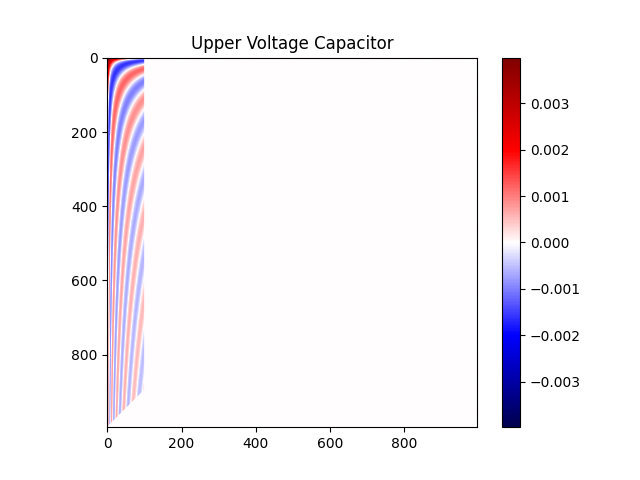

In [24]:
figcu,axcu =plt.subplots()

max_voltage_capacitor = np.max(Voltage_Capacitor)  
plt.title("Upper Voltage Capacitor")
c = plt.imshow(upper_voltage_capacitor,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

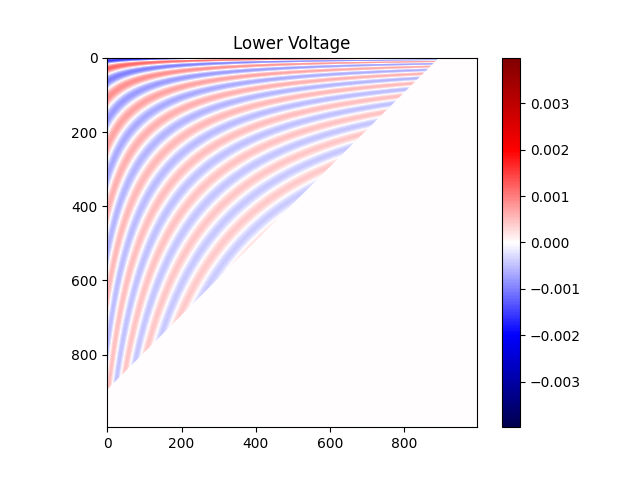

In [25]:
figclvc,axclvc =plt.subplots()

plt.title("Lower Voltage")
c = plt.imshow(lower_voltage_capacitor,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

In [26]:
def shif_and_pad_array_x(arr,number_lines):
    
    rolled_arr = np.roll(arr, number_lines, axis=0)
    
    left_arr = rolled_arr[0:number_lines,:]
    left_arr = np.full(left_arr.shape,0,dtype=left_arr.dtype)
    
    
    rolled_arr= np.delete(rolled_arr,np.arange(0,number_lines,1),axis=0)
    rolled_arr = np.append(left_arr,rolled_arr,axis=0)
    
    return rolled_arr

In [27]:
voltage_capacitor_merge_ready = shif_and_pad_array_x(lower_voltage_capacitor,a)

time_merge_ready = shif_and_pad_array_x(lower_time,a)

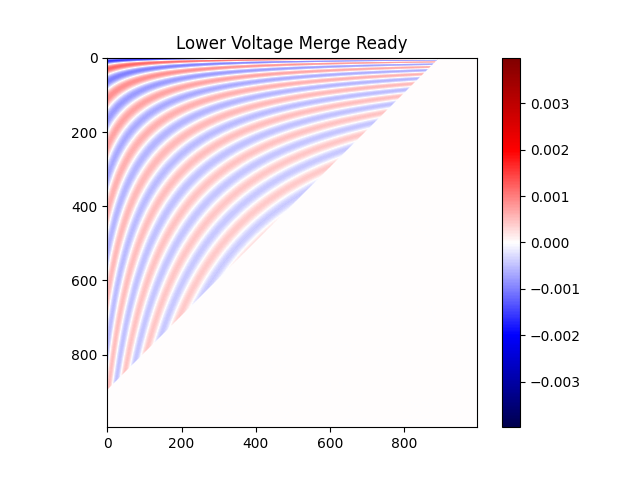

In [28]:
figclvmr,axclvmr =plt.subplots()

plt.title("Lower Voltage Merge Ready")
c = plt.imshow(voltage_capacitor_merge_ready,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

check if merge ready correspond in arrival time

In [29]:
upper_time[a+5,2]

60.2

In [30]:
time_merge_ready[a+5,2]

60.2

In [31]:
voltage_capacitor_merged = voltage_capacitor_merge_ready + upper_voltage_capacitor

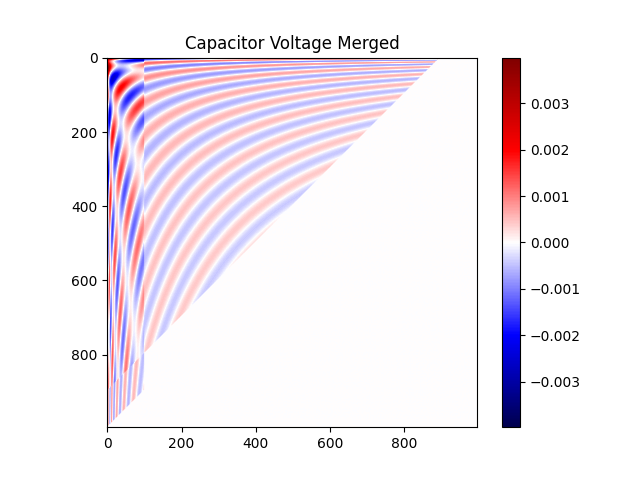

In [32]:
figclvm,axclvm =plt.subplots()

plt.title("Capacitor Voltage Merged")
c = plt.imshow(voltage_capacitor_merged,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

In [33]:
def multiplicative_merging(arr,a_factor,b_factor):
    upper_arr,lower_arr = make_upper_and_lower(arr,b_factor)
    arr_merge_ready = shif_and_pad_array_x(lower_arr,a_factor)
    
    arr_merged = upper_arr + arr_merge_ready
    
    return arr_merged

test multiplicative_merging, should produce blank image

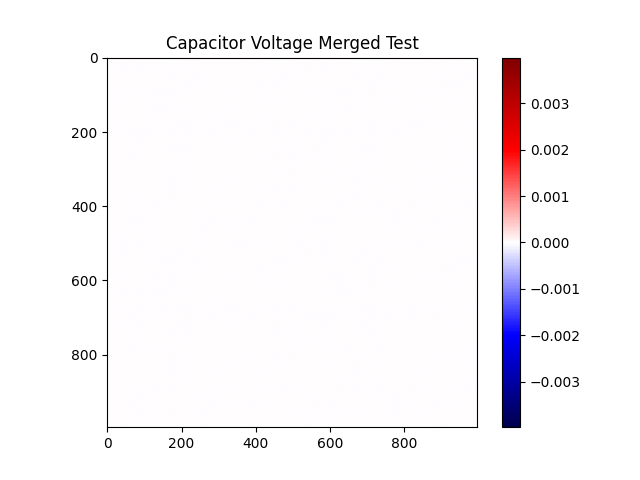

In [34]:
voltage_capacitor_merged_test = multiplicative_merging(Voltage_Capacitor,a,b)

voltage_capacitor_merged_test = voltage_capacitor_merged_test - voltage_capacitor_merged

figclvmt,axclvmt =plt.subplots()

axclvmt.set_title("Capacitor Voltage Merged Test")
c = axclvmt.imshow(voltage_capacitor_merged_test,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
figclvmt.colorbar(c)

2 layers of merging

In [35]:
voltage_capacitor_merged = multiplicative_merging(Voltage_Capacitor,a,b)

number_merge_cycles = math.ceil(Merge_Full.Number_of_Layers/Merge_Full.Capacitor_LCM_Factor)

for _ in range (0,number_merge_cycles):
    voltage_capacitor_merged = multiplicative_merging(voltage_capacitor_merged,a,b)

voltage_capacitor_merged_cropped = voltage_capacitor_merged[:,0:Merge_Full.b]

print(number_merge_cycles)

10


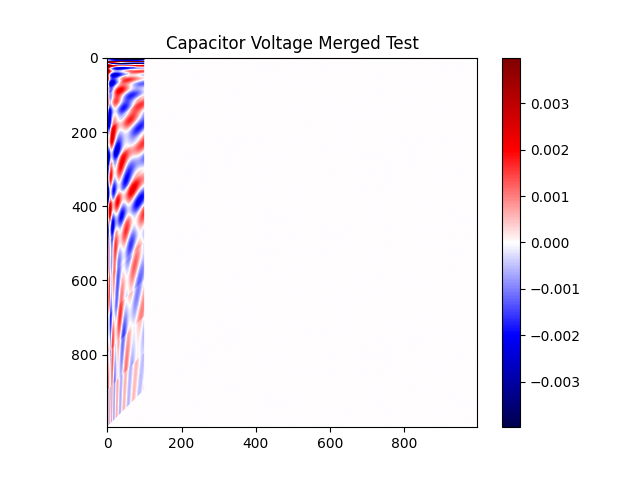

In [36]:
figclvmt,axclvmt =plt.subplots()

plt.title("Capacitor Voltage Merged Test")
c = plt.imshow(voltage_capacitor_merged,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

In [37]:
series = voltage_capacitor_merged[0:-1,0]
time = Time_float[0:-1,0]

## plot time series

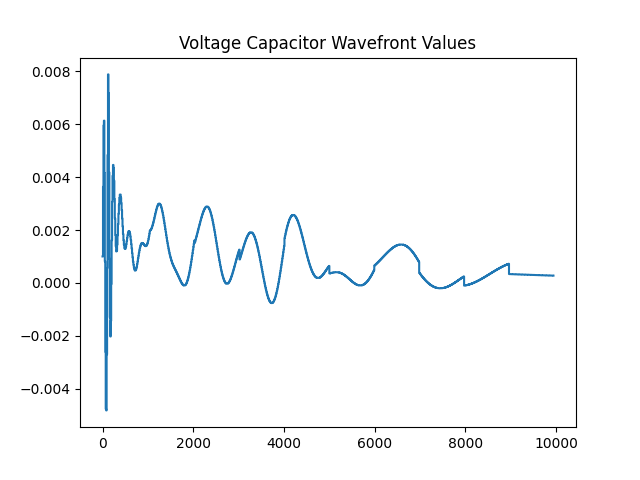

In [38]:
fig_series,ax_sereis =plt.subplots()

plt.title("Voltage Capacitor Wavefront Values")
plt.step(time,series,where='post')


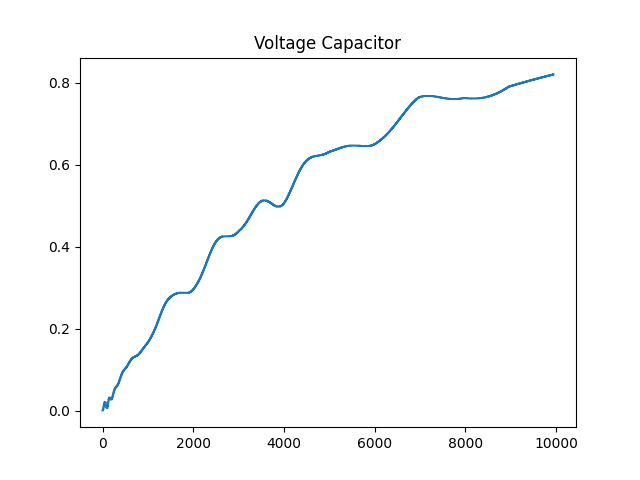

In [39]:
integrated_series = np.cumsum(series)  

fig_integrated_series,ax_integrated_sereis =plt.subplots()

plt.title("Voltage Capacitor")
plt.step(time,integrated_series,where='post')
  

## Follow Options Ordering

In [40]:
latest_time = 0

x_index = 0
y_index = 0

option_time = []
option_indexes =[]

out_time = []
out_indexes = []
out_voltage = []

Voltage = voltage_capacitor_merged_cropped
Time = delete_alternating(Inductor_Sending_Time)
Time = Time[:,0:Merge_Full.b]
Marked = np.zeros(Time.shape,dtype=Time.dtype)


def store_options(input_arr,x,y,magnitude,indexes):
    x_size,y_size = input_arr.shape
    
    
    if(x+1 < x_size and Marked[x+1,y] == 0):
        
        option_a = input_arr[x+1,y]
        magnitude.append(option_a)
        indexes.append([x+1,y])
        Marked[x+1,y] = 1
    
    if(y+1 < y_size and Marked[x,y+1] == 0):
        
        option_b = input_arr[x,y+1]
        magnitude.append(option_b)
        indexes.append([x,y+1])
        Marked[x,y+1] = 1
    

def get_best_option_value_index(opt_arr,opt_indexes):
    opt_index_min = np.argmin(opt_arr)
    
    value = opt_arr[opt_index_min]
    del opt_arr[opt_index_min]
    
    index = opt_indexes[opt_index_min]
    del opt_indexes[opt_index_min]
    
    return value, index


# Store Initial Point
out_time.append(Time[0,0])
out_indexes.append([0,0])
out_voltage.append(Voltage[0,0])
Marked[0,0] = 1

while latest_time < Merge_Full.Simulation_Stop_Time:
    
    # store options at location
    store_options(Time,x_index,y_index,option_time,option_indexes)
    
    
    if(len(option_time) > 0):
        # get best option
        best_time, best_time_index = get_best_option_value_index(option_time,option_indexes)
        
        out_time.append(best_time)
        out_indexes.append(best_time_index)
        
        out_voltage.append(Voltage[best_time_index[0],best_time_index[1]] )
        
        Marked[best_time_index[0],best_time_index[1]]  = 2
    
    latest_time = best_time
    x_index, y_index = best_time_index
    
    

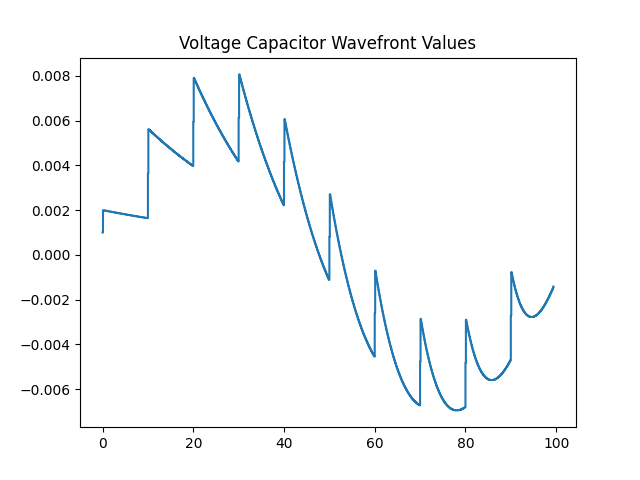

In [41]:
fig_series_voltage,ax_series_voltage =plt.subplots()

plt.title("Voltage Capacitor Wavefront Values")
plt.step(out_time,out_voltage,where='post')


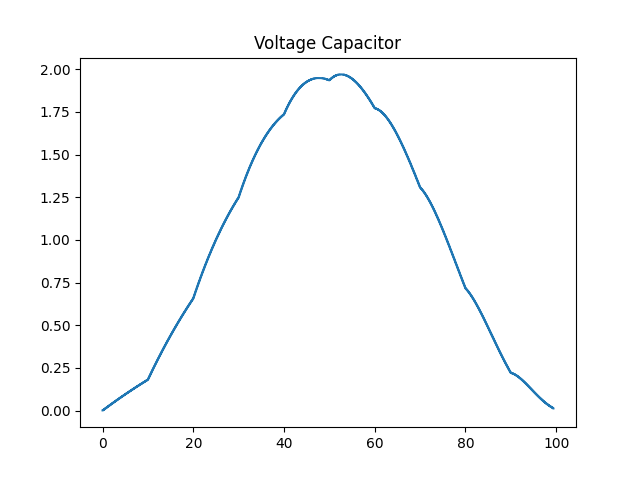

In [44]:
integrated_voltage = np.cumsum(out_voltage)  

fig_integrated_series,ax_integrated_sereis =plt.subplots()

plt.title("Voltage Capacitor")
plt.step(out_time,integrated_voltage,where='post')
  

## Gradient Follow

In [43]:
A = Decimal(L_Time)
B = Decimal(C_Time)

LCM , GCF = Merge_Full.lcm_gcd(A,B)

a = int((B)/(GCF))
b = int((A)/(GCF))

A_to_B_x = 0
A_to_B_y = 0

for  y in range(0,Merge_Full.Number_of_Wavefronts):
    
    if( (y*B - GCF )%A == 0):
        A_to_B_x = (y*B - GCF)/A
        A_to_B_y = y
        break
    
    if(y == Merge_Full.Number_of_Wavefronts ):
        print('Eish')
        

B_to_A_x = 0
B_to_A_y = 0

for  y in range(0,Merge_Full.Number_of_Wavefronts):
    
    if( (y*B + GCF )%A == 0):
        B_to_A_x = (y*B + GCF)/A
        B_to_A_y = y
        break
    
    if(y == Merge_Full.Number_of_Wavefronts ):
        print('Eish')

print('A :',A)
print('B :',B)
print('GCF :',GCF)
print('LCM :',LCM)
print('a :',a)
print('b :',b)
print('A_to_B_x : ' + str(A_to_B_x))
print('A_to_B_y : ' + str(A_to_B_y))
print('B_to_A_x : ' + str(B_to_A_x))
print('B_to_A_y : ' + str(B_to_A_y))

A : 10
B : 0.1
GCF : 0.1
LCM : 10
a : 1
b : 100
A_to_B_x : 0.0
A_to_B_y : 1
B_to_A_x : 1.0
B_to_A_y : 99
